In [2]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

## Wholesale customers data

In [15]:
wcd_df = pd.DataFrame
wcd_df = pd.read_csv('wholesale_customers_data_preprocessed.csv')
wcd_df.head()

,Unnamed: 0,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Lisbon,Region_Oporto,Other Region
0,0,1,12669,9656,7561,214,2674,1338,0,0,1
1,1,1,7057,9810,9568,1762,3293,1776,0,0,1
2,2,1,6353,8808,7684,2405,3516,7844,0,0,1
3,3,0,13265,1196,4221,6404,507,1788,0,0,1
4,4,1,22615,5410,7198,3915,1777,5185,0,0,1


In [16]:
del wcd_df['Unnamed: 0']

In [17]:
wcd_df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_Lisbon,Region_Oporto,Other Region
0,1,12669,9656,7561,214,2674,1338,0,0,1
1,1,7057,9810,9568,1762,3293,1776,0,0,1
2,1,6353,8808,7684,2405,3516,7844,0,0,1
3,0,13265,1196,4221,6404,507,1788,0,0,1
4,1,22615,5410,7198,3915,1777,5185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
435,0,29703,12051,16027,13135,182,2204,0,0,1
436,0,39228,1431,764,4510,93,2346,0,0,1
437,1,14531,15488,30243,437,14841,1867,0,0,1
438,0,10290,1981,2232,1038,168,2125,0,0,1


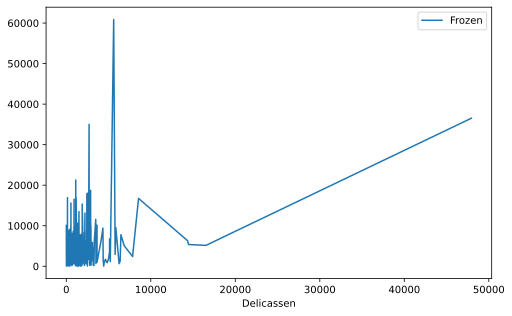

In [18]:
df = wcd_df[[x for x in wcd_df.columns if 'Frozen' in x] + ['Delicassen']]
df.groupby('Delicassen').sum().plot()

По графику видно, что с увеличением затрат на деликатесы покупается больше замароженных продуктов. 

Посмотрим зависимости между продажами:

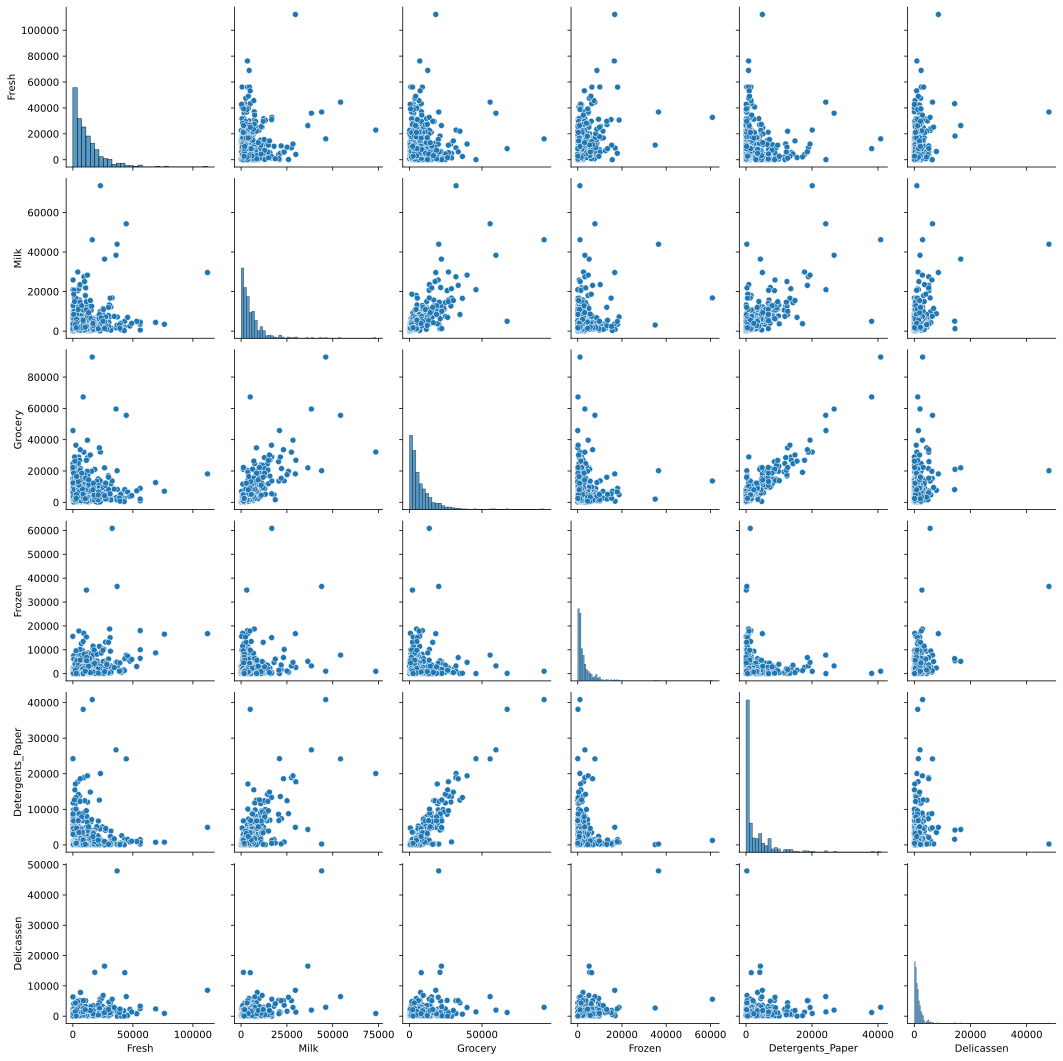

In [23]:
sns_plot = sns.pairplot(wcd_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


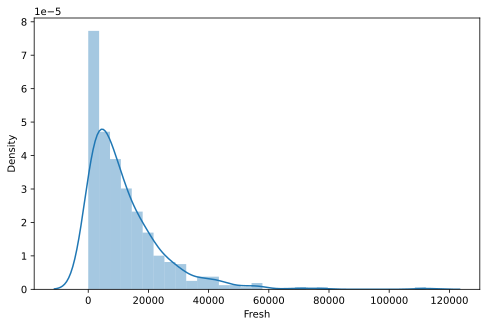

In [27]:
sns.distplot(wcd_df.Fresh)

Видим что прибыль с продаж свежих продуктов обратно пропорциональна количеству таких продаж, т.е. с увеличением прибыли с продаж уменьшается число таких продаж.

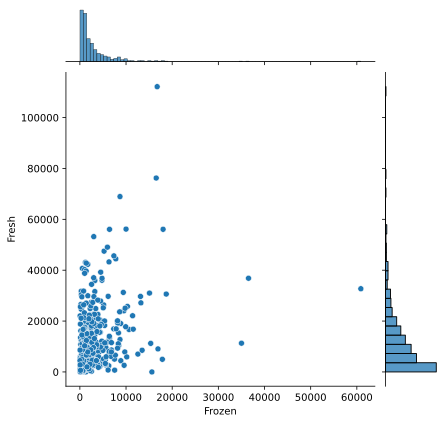

In [29]:
sns.jointplot(y=wcd_df['Fresh'], x=wcd_df['Frozen'])

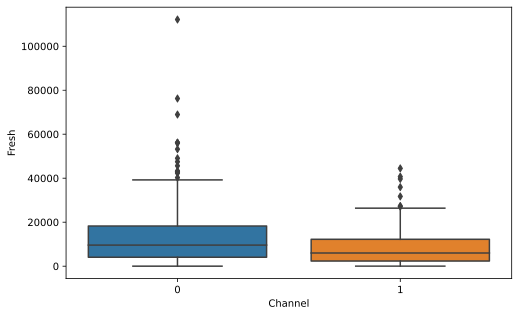

In [40]:
sns.boxplot(x='Channel', y='Fresh', data=wcd_df)

## Energy efficiency preprocessed

In [44]:
energy_df = pd.DataFrame
energy_df = pd.read_csv('energy_efficiency_preprocessed.csv')
energy_df.head()

,Unnamed: 0,Compactness,S_Surface,S_Wall,S_Roof,Overall_Height,S_Glazing,Heating Load,Cooling Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,Glass_0,Glass_1,Glass_2,Glass_3,Glass_4,Glass_5
0,0,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,1,0,0,0,1,0,0,0,0,0
1,1,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,1,0,0,1,0,0,0,0,0
2,2,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,0,1,0,1,0,0,0,0,0
3,3,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,0,0,1,1,0,0,0,0,0
4,4,0.90,563.5,318.5,122.50,1,0.0,20.84,28.28,1,0,0,0,1,0,0,0,0,0


In [45]:
del energy_df['Unnamed: 0']

In [46]:
energy_df

,Compactness,S_Surface,S_Wall,S_Roof,Overall_Height,S_Glazing,Heating Load,Cooling Load,Orientation_2,Orientation_3,Orientation_4,Orientation_5,Glass_0,Glass_1,Glass_2,Glass_3,Glass_4,Glass_5
0,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,1,0,0,0,1,0,0,0,0,0
1,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,1,0,0,1,0,0,0,0,0
2,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,0,1,0,1,0,0,0,0,0
3,0.98,514.5,294.0,110.25,1,0.0,15.55,21.33,0,0,0,1,1,0,0,0,0,0
4,0.90,563.5,318.5,122.50,1,0.0,20.84,28.28,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,0,0.4,17.88,21.40,0,0,0,1,0,0,0,0,0,1
764,0.62,808.5,367.5,220.50,0,0.4,16.54,16.88,1,0,0,0,0,0,0,0,0,1
765,0.62,808.5,367.5,220.50,0,0.4,16.44,17.11,0,1,0,0,0,0,0,0,0,1
766,0.62,808.5,367.5,220.50,0,0.4,16.48,16.61,0,0,1,0,0,0,0,0,0,1


Посмотрим на распределение площадей относительно компактности:

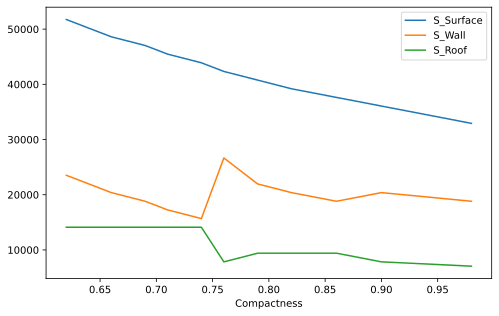

In [74]:
energy_df[['Compactness', 'S_Surface', 'S_Wall', 'S_Roof']].groupby('Compactness').sum().plot()

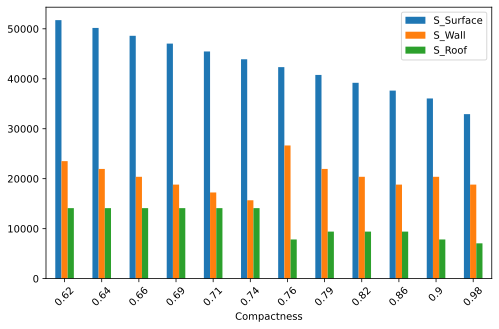

In [71]:
energy_df[['Compactness', 'S_Surface', 'S_Wall', 'S_Roof']].groupby('Compactness').sum().plot(kind='bar', rot=45)

Площади равномерно уменьшаются при увеличении компактности

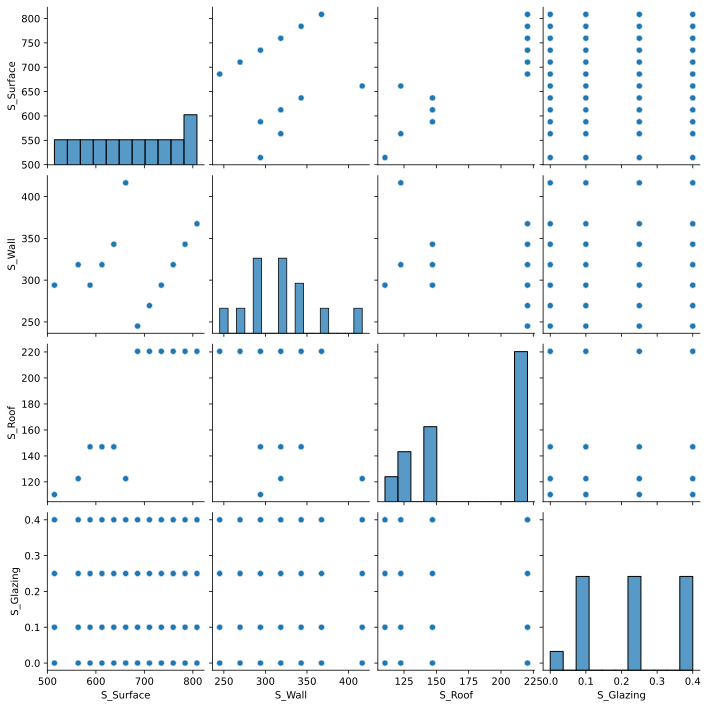

In [78]:
sns_plot = sns.pairplot(energy_df[['S_Surface', 'S_Wall', 'S_Roof', 'S_Glazing']])

На данных графиках видим зависимости площадей

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


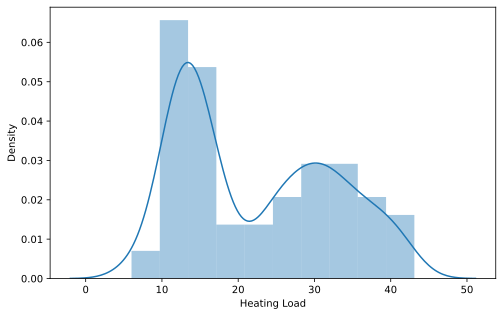

In [81]:
sns.distplot(energy_df['Heating Load'])

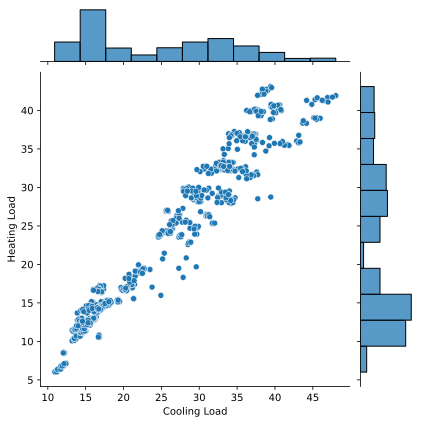

In [84]:
sns.jointplot(y=energy_df['Heating Load'], x=energy_df['Cooling Load'])

Видим, что охлаждающая и нагревательная нагрузка  прямо пропорциональны

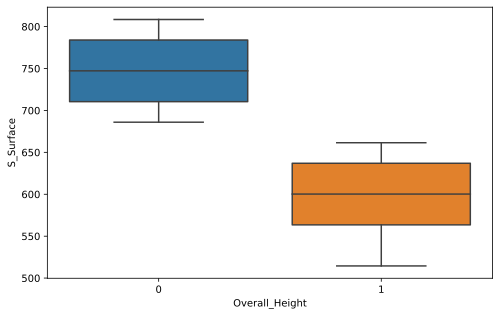

In [99]:
sns.boxplot(y='S_Surface' , x='Overall_Height', data=energy_df)

Величины прощадей, относящихся к разным высотам не пресекаются